In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

## Load and visuallize data

In [81]:
df_train = pd.read_csv(r"../../data/final/baselinestore/processed_train.csv")
df_test = pd.read_csv(r"../../data/final/baselinestore/processed_test.csv")

In [82]:
columns_remove = [
    'SEQN',
    'VitaminD',
    'YearStart',
    'YearID'
]

In [83]:
df_train = df_train[df_train['milk_consumption']<=3]
df_test = df_test[df_test['milk_consumption']<=3]

In [84]:
df_train.drop(columns=columns_remove, inplace=True)
df_test.drop(columns=columns_remove, inplace=True)

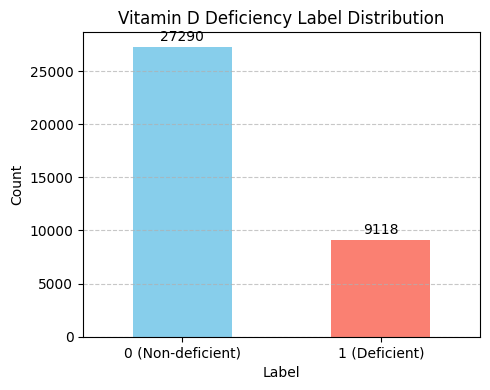

In [85]:
import matplotlib.pyplot as plt

# Count the labels
label_counts = df_train['label'].value_counts()

# Plot
plt.figure(figsize=(5, 4))
bars = label_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Add numbers on top of bars
for i, count in enumerate(label_counts):
    plt.text(i, count + max(label_counts) * 0.01, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Vitamin D Deficiency Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0 (Non-deficient)', '1 (Deficient)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


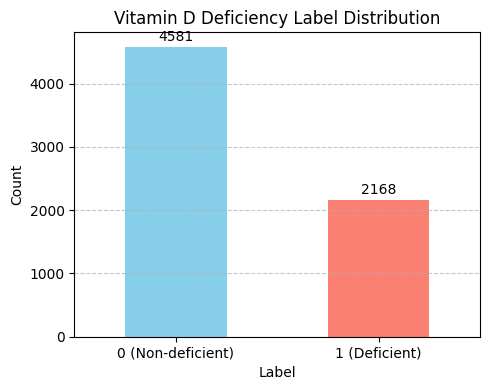

In [86]:
import matplotlib.pyplot as plt

# Count the labels
label_counts = df_test['label'].value_counts()

# Plot
plt.figure(figsize=(5, 4))
bars = label_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Add numbers on top of bars
for i, count in enumerate(label_counts):
    plt.text(i, count + max(label_counts) * 0.01, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Vitamin D Deficiency Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0 (Non-deficient)', '1 (Deficient)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [87]:
category_columns = [
    'Gender', 'Race', 'label','milk_consumption'
]

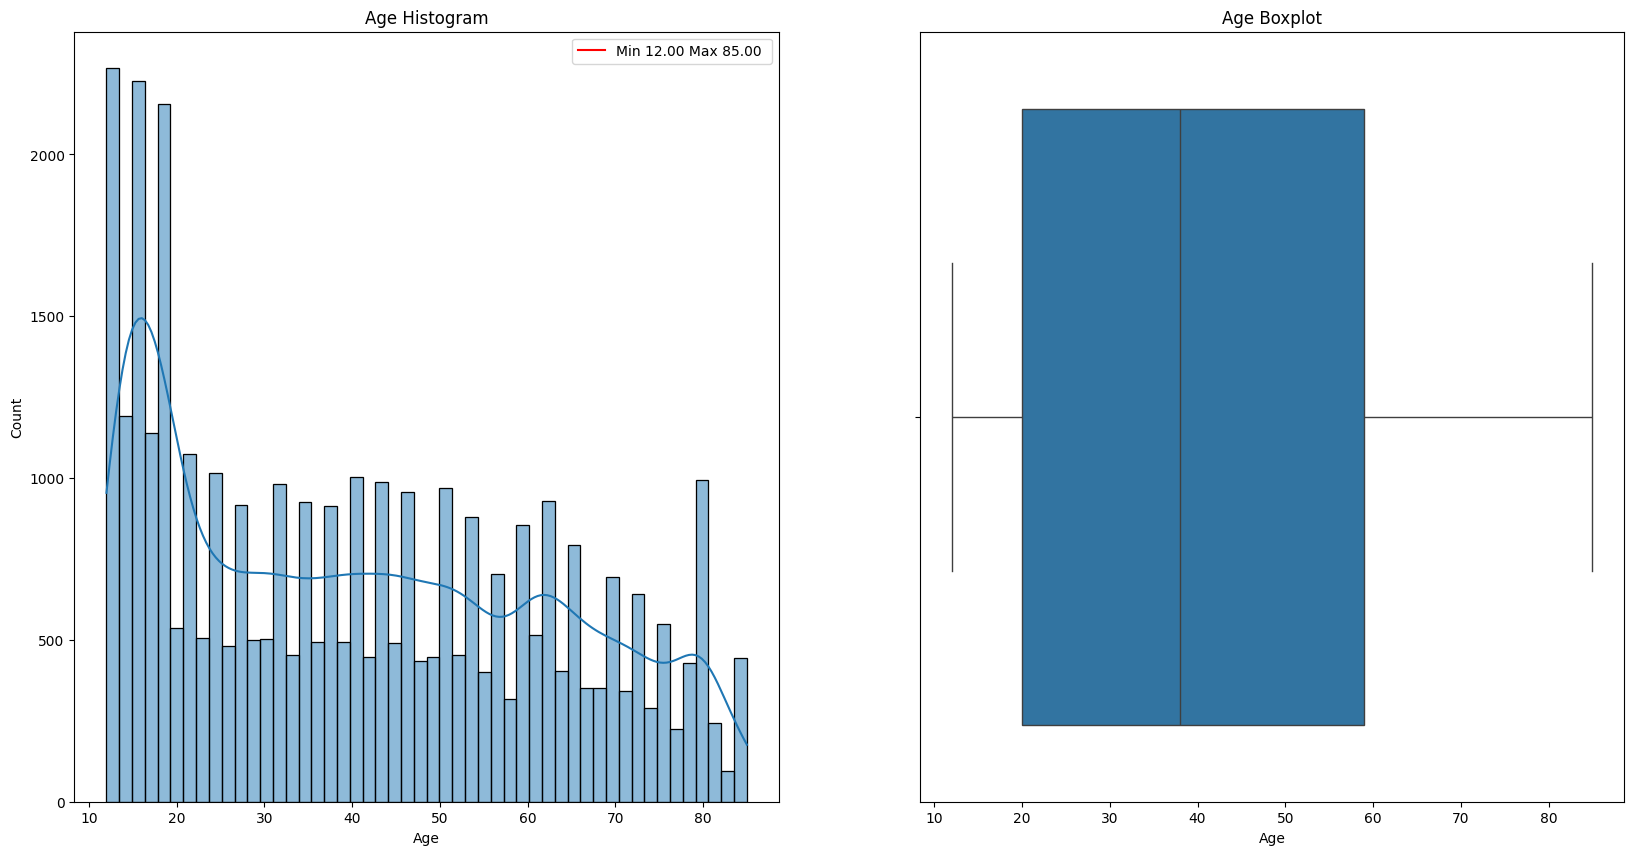

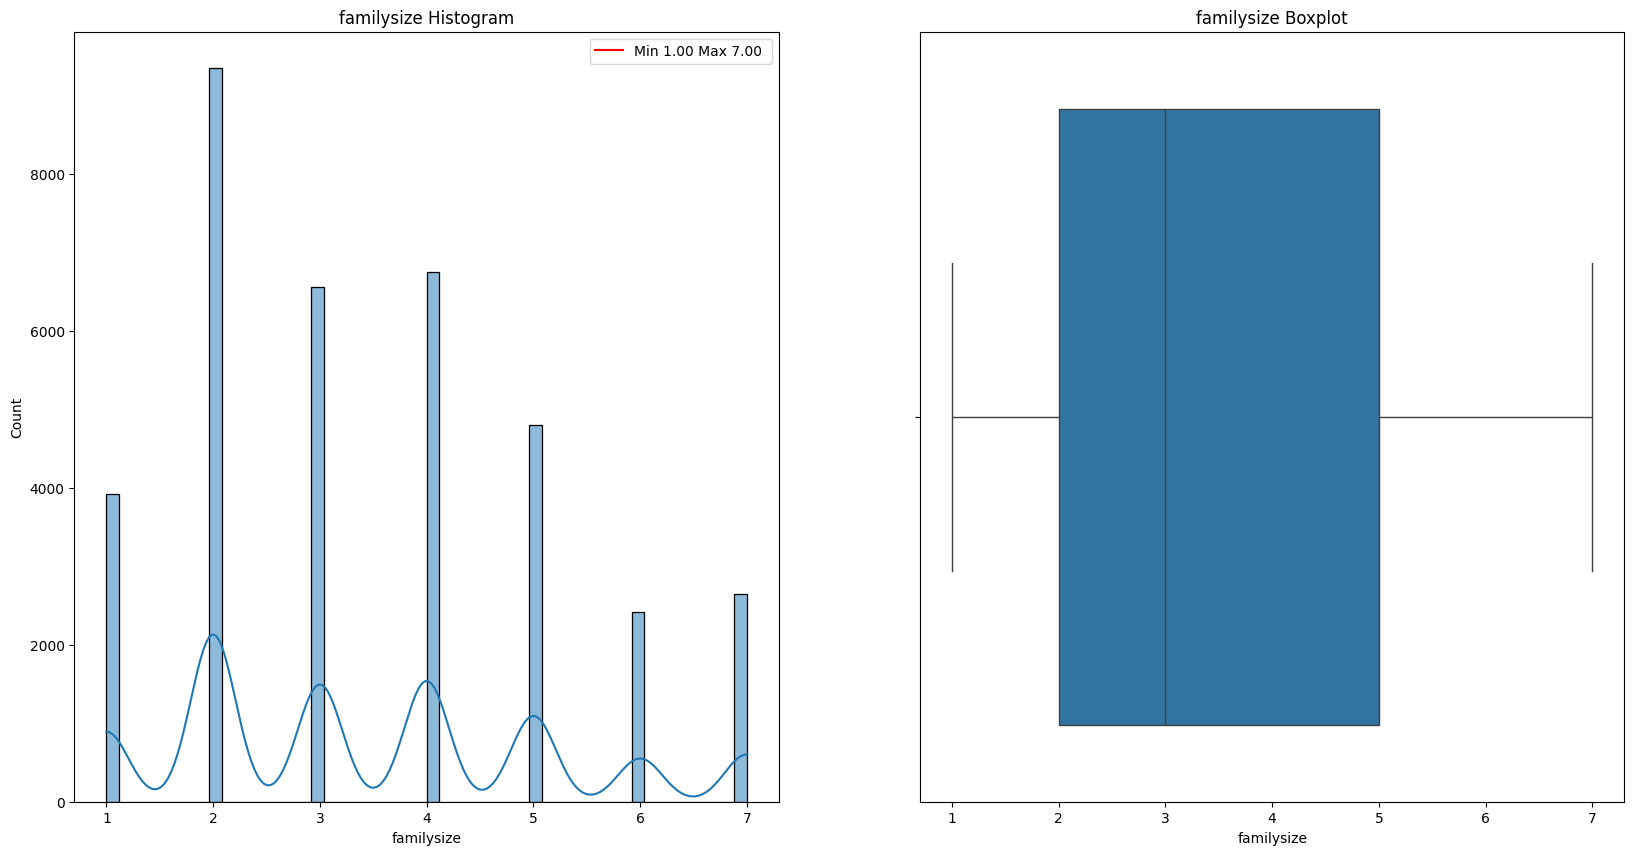

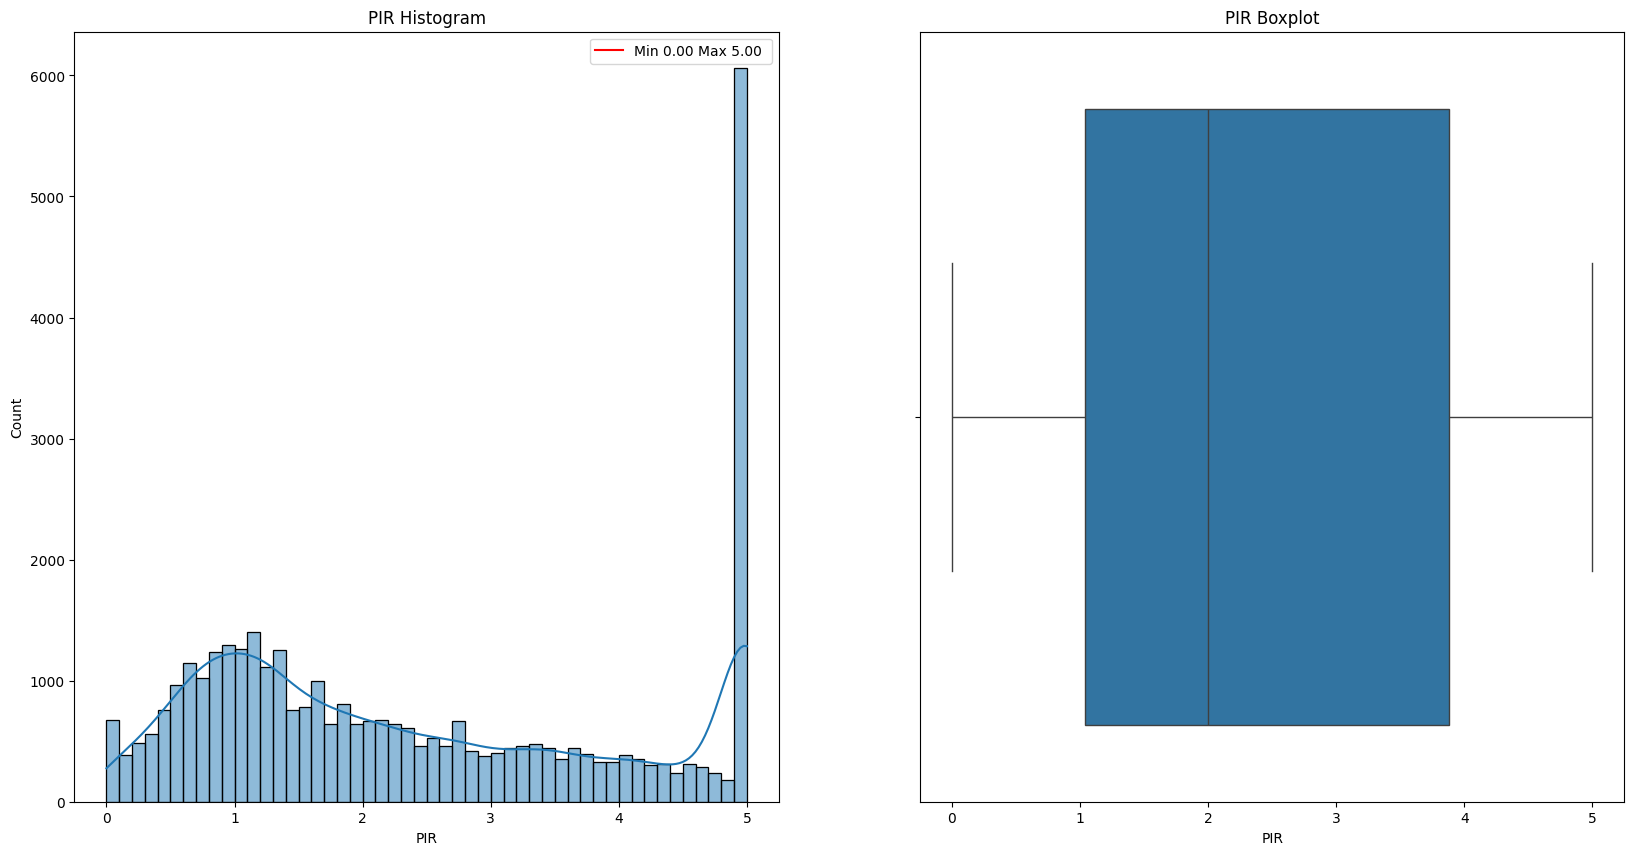

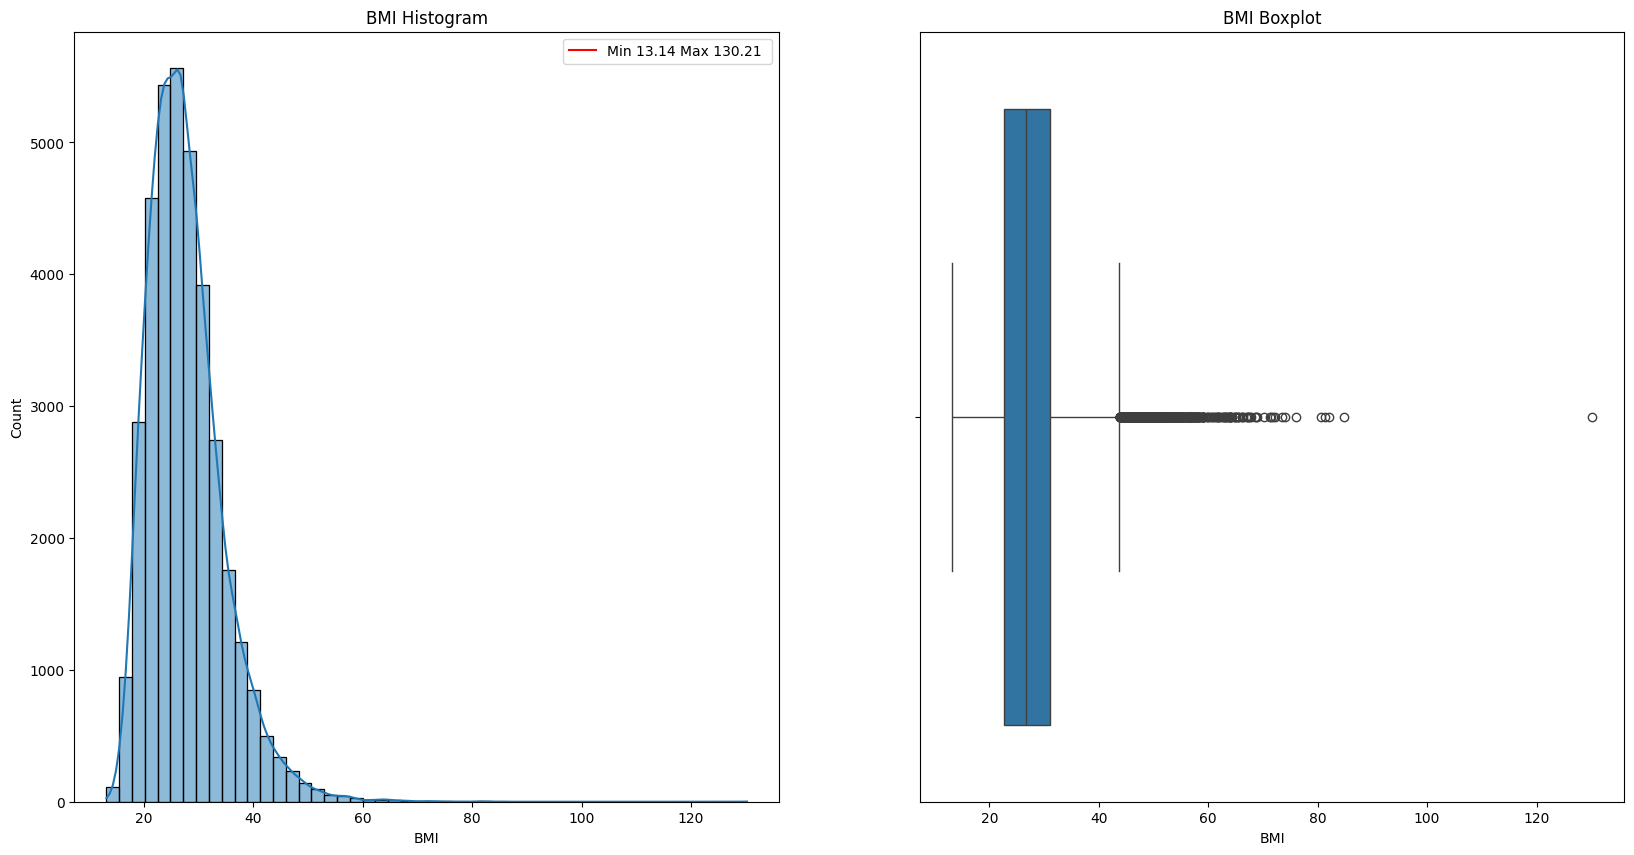

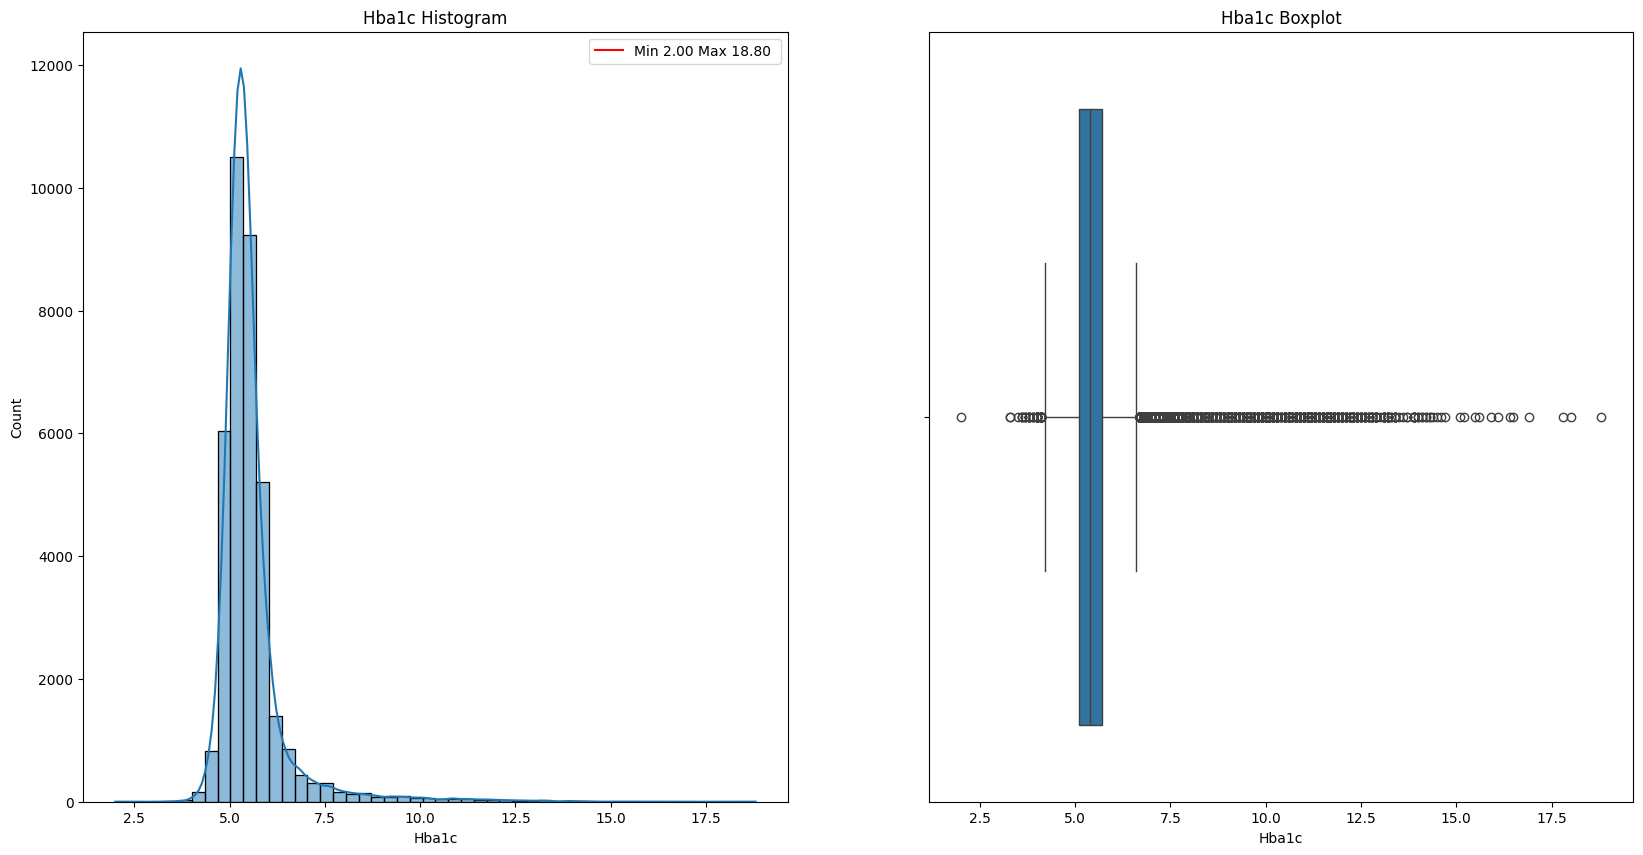

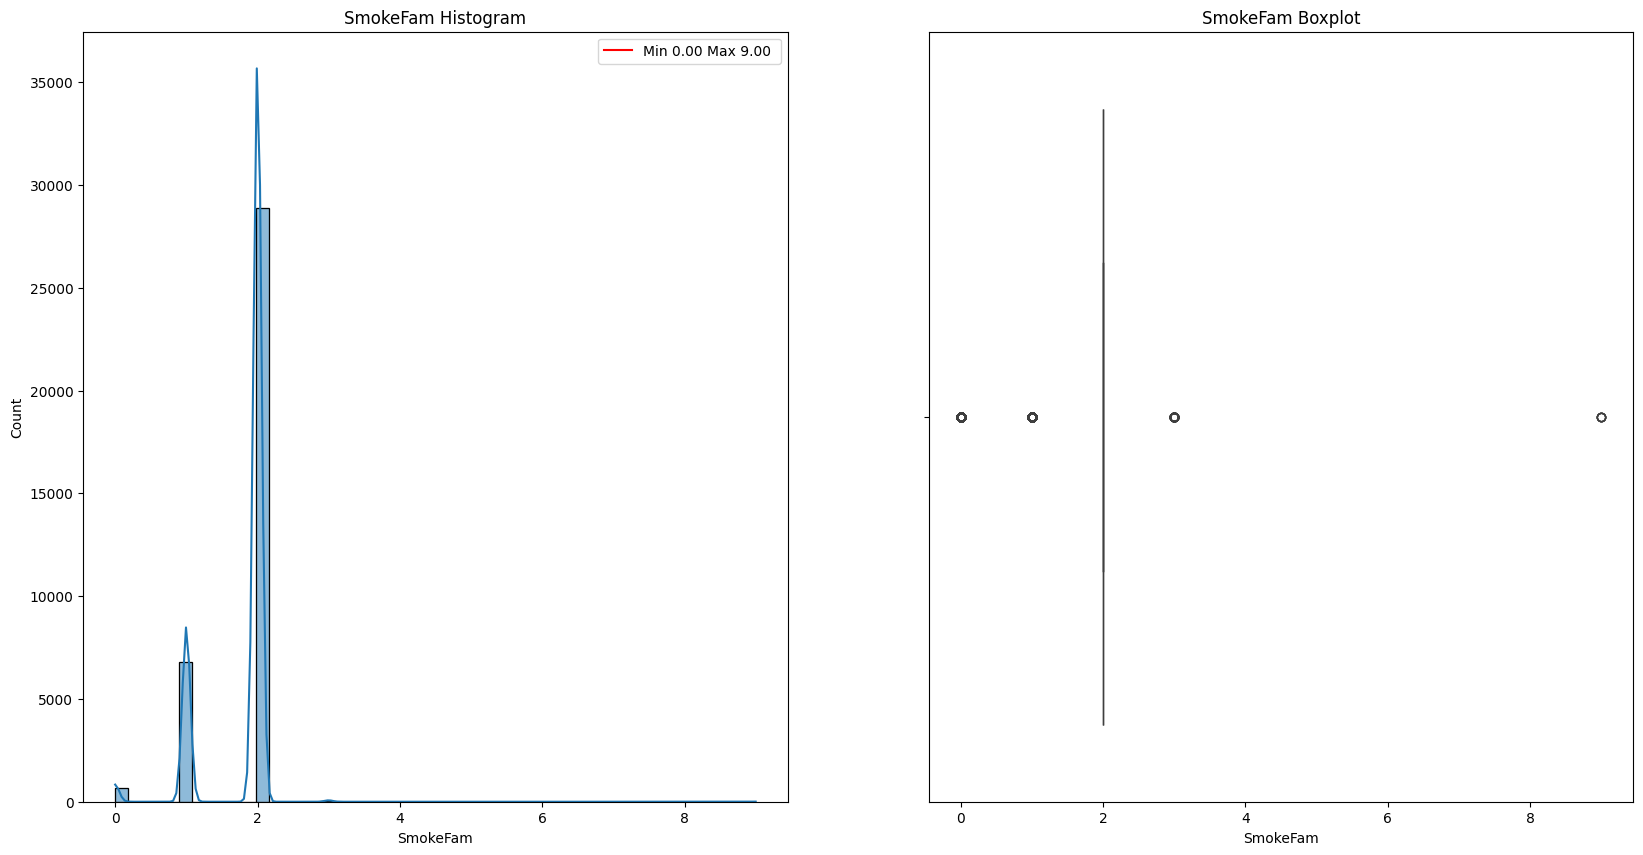

In [88]:
#revisuallize clean data
df_scaled = df_train.copy()
df_scaled.drop(columns=category_columns, inplace=True)

for col in df_scaled.columns:
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.histplot(df_scaled[col], bins=50, kde=True)
    plt.plot([], [], label = f"Min {df_scaled[col].min():.2f} Max {df_scaled[col].max():.2f} ", color='red')
    plt.legend()
    plt.title(f"{col} Histogram")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_scaled[col])
    plt.title(f"{col} Boxplot")

    plt.show()


## Model training and evaluation

Numeric columns: ['Age', 'familysize', 'PIR', 'BMI', 'SmokeFam']
Categorical columns: ['Gender', 'Race', 'Hba1c', 'milk_consumption']

🚀 Training and Evaluating: XGBoost


c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:35:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79      4581
         1.0       0.57      0.55      0.56      2168

    accuracy                           0.72      6749
   macro avg       0.68      0.67      0.68      6749
weighted avg       0.72      0.72      0.72      6749



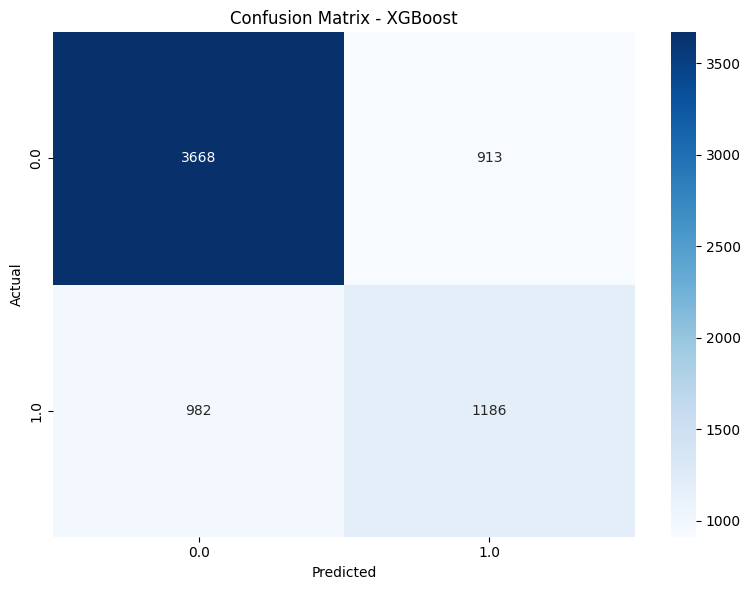


🚀 Training and Evaluating: ElasticNetLogistic


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.49      0.62      4581
         1.0       0.43      0.82      0.57      2168

    accuracy                           0.60      6749
   macro avg       0.64      0.66      0.59      6749
weighted avg       0.72      0.60      0.60      6749



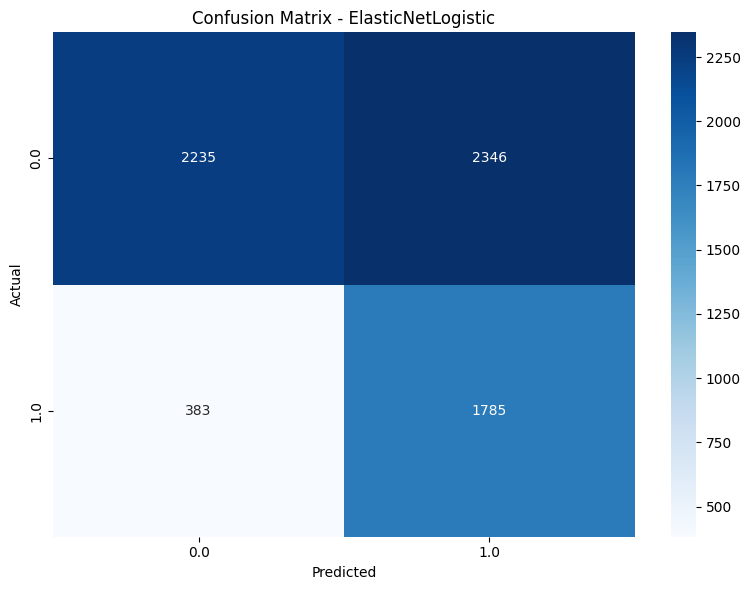


🚀 Training and Evaluating: RandomForest
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.84      0.80      4581
         1.0       0.56      0.42      0.48      2168

    accuracy                           0.71      6749
   macro avg       0.66      0.63      0.64      6749
weighted avg       0.69      0.71      0.69      6749



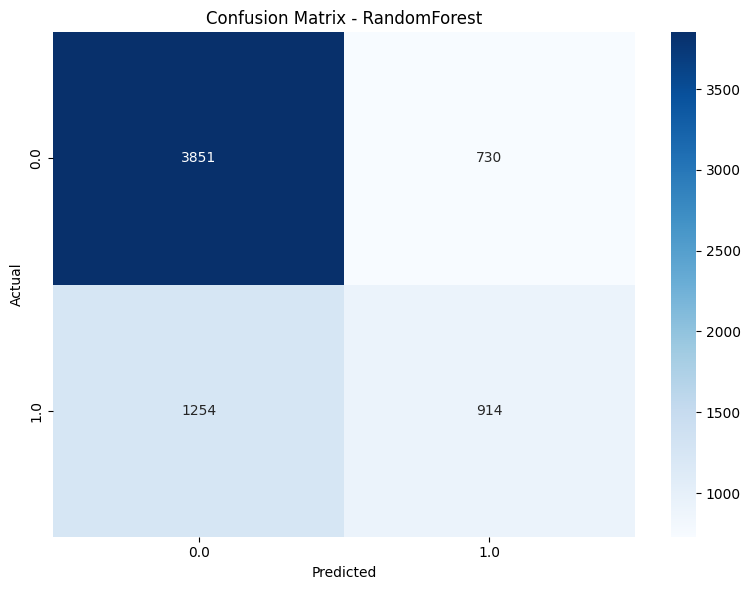


🚀 Training and Evaluating: AdaBoost
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.62      0.71      4581
         1.0       0.47      0.72      0.57      2168

    accuracy                           0.65      6749
   macro avg       0.65      0.67      0.64      6749
weighted avg       0.71      0.65      0.67      6749



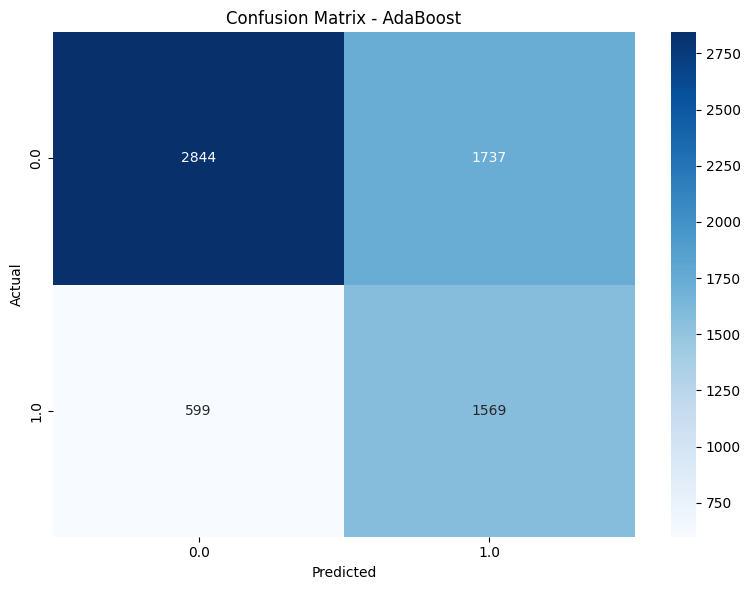


🚀 Training and Evaluating: LightGBM
[LightGBM] [Info] Number of positive: 27290, number of negative: 27290
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006778 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9620
[LightGBM] [Info] Number of data points in the train set: 54580, number of used features: 96
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81      4581
         1.0       0.59      0.42      0.49      2168

    accuracy                           0.72      6749
   macro avg       0.67      0.64      0.65      6749
weighted avg       0.70      0.72      0.70      6749



c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


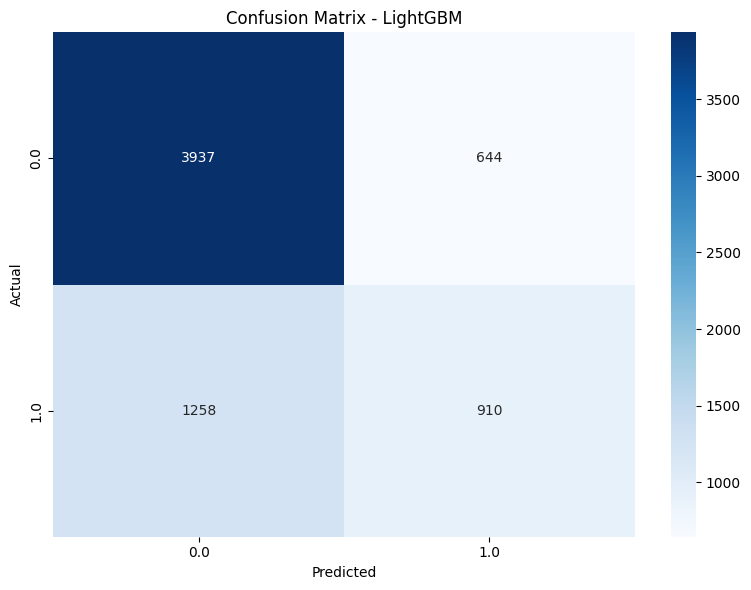

✅ Exported results to model_comparison_results.csv


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


# Separate features and labels
X_train_raw = df_train.drop(columns=['label'])
y_train = df_train['label']

X_test_raw = df_test.drop(columns=['label'])
y_test = df_test['label']

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Race', 'Hba1c', 'milk_consumption']  # removed 'SmokeFam'
numeric_cols = [col for col in df_train.columns if col not in categorical_cols + ['label']]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# Define preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# Define models
models_to_test = {
    'XGBoost': XGBClassifier(
        colsample_bytree=1.0, learning_rate=0.1, max_depth=7,
        n_estimators=50, subsample=1.0, use_label_encoder=False,
        eval_metric='mlogloss', random_state=42
    ),
    'ElasticNetLogistic': LogisticRegression(
        penalty='elasticnet', solver='saga', max_iter=1000,
        random_state=42, multi_class='multinomial', C=1.0, l1_ratio=1.0
    ),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
}


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

results = []

for name, model in models_to_test.items():
    print(f"\n🚀 Training and Evaluating: {name}")
    
    pipe = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, sampling_strategy='minority')),
        ('classifier', model)
    ])
    
    pipe.fit(X_train_raw, y_train)
    y_pred = pipe.predict(X_test_raw)
    
    # Predict proba for AUC
    y_proba = pipe.predict_proba(X_test_raw)

    # Handle binary and multiclass AUC
    if len(np.unique(y_test)) == 2:
        auc = roc_auc_score(y_test, y_proba[:, 1])
    else:
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')

    # Collect scores
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Save result
    results.append({
        'Model': name,
        'Precision (Macro)': precision,
        'Recall (Macro)': recall,
        'F1 Score (Macro)': f1,
        'Accuracy': accuracy,
        'AUC': auc
    })

    # Optional: show classification report and confusion matrix
    print("🔍 Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
results_df = pd.DataFrame(results)
results_df.to_csv("model_comparison_results_baseline.csv", index=False)
print("✅ Exported results to model_comparison_results.csv")

Numeric columns: ['Age', 'familysize', 'PIR', 'BMI', 'SmokeFam']
Categorical columns: ['Gender', 'Race', 'Hba1c', 'milk_consumption']

🚀 Training and Evaluating: XGBoost
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.47      0.61      4581
         1.0       0.42      0.81      0.56      2168

    accuracy                           0.58      6749
   macro avg       0.63      0.64      0.58      6749
weighted avg       0.71      0.58      0.59      6749



c:\mydata\G8Vitamin\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:52:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


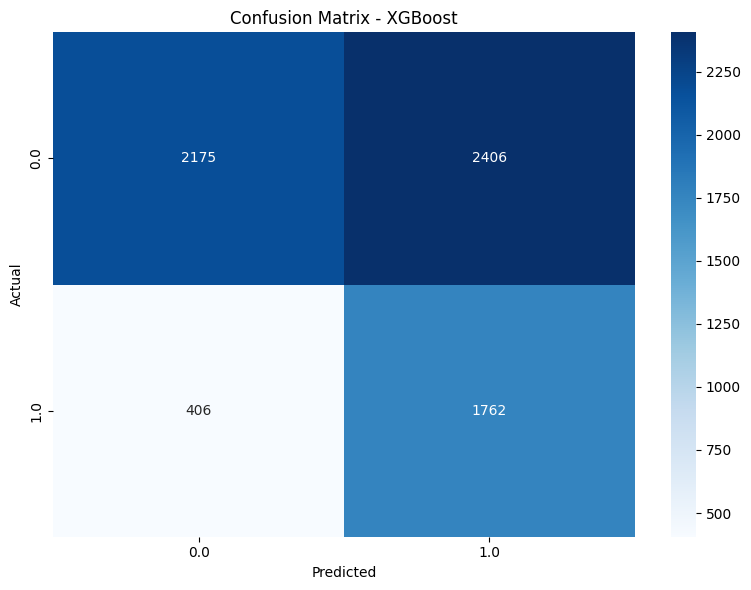


🚀 Training and Evaluating: ElasticNetLogistic


c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.46      0.60      4581
         1.0       0.42      0.84      0.56      2168

    accuracy                           0.58      6749
   macro avg       0.64      0.65      0.58      6749
weighted avg       0.72      0.58      0.59      6749



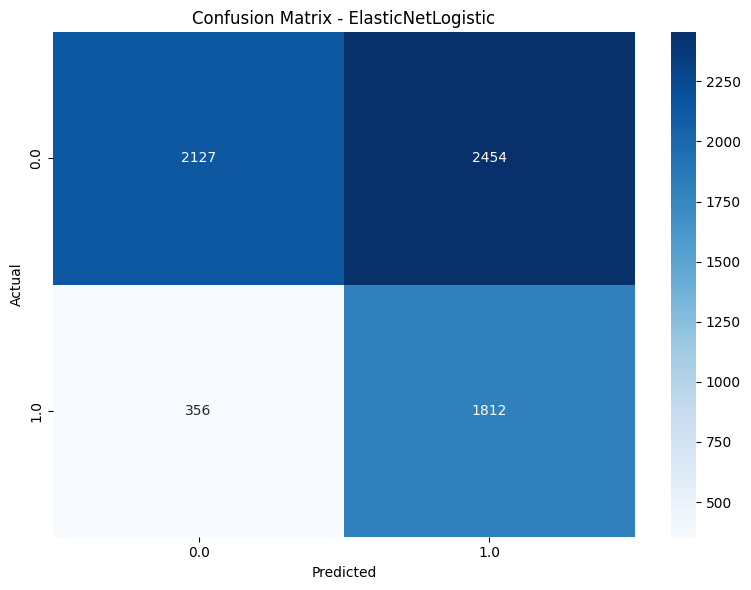


🚀 Training and Evaluating: RandomForest
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.51      0.63      4581
         1.0       0.43      0.77      0.55      2168

    accuracy                           0.59      6749
   macro avg       0.63      0.64      0.59      6749
weighted avg       0.70      0.59      0.60      6749



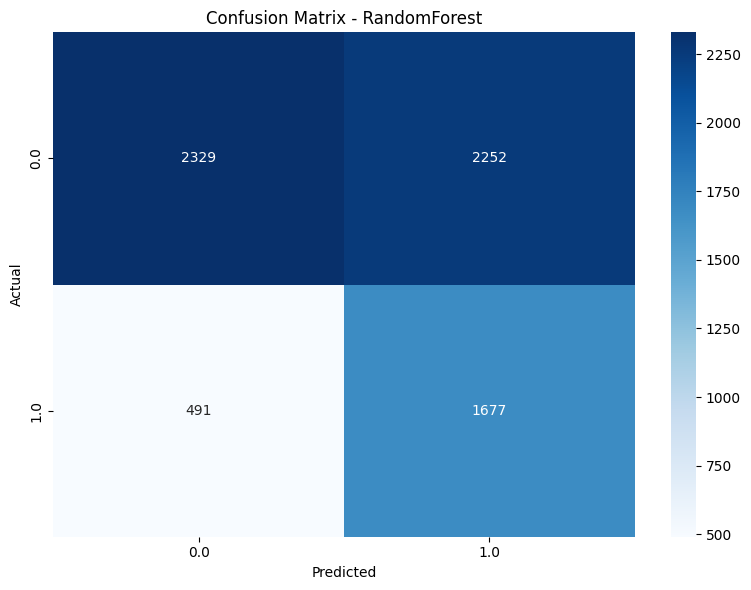


🚀 Training and Evaluating: AdaBoost
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.52      0.65      4581
         1.0       0.44      0.80      0.57      2168

    accuracy                           0.61      6749
   macro avg       0.64      0.66      0.61      6749
weighted avg       0.72      0.61      0.62      6749



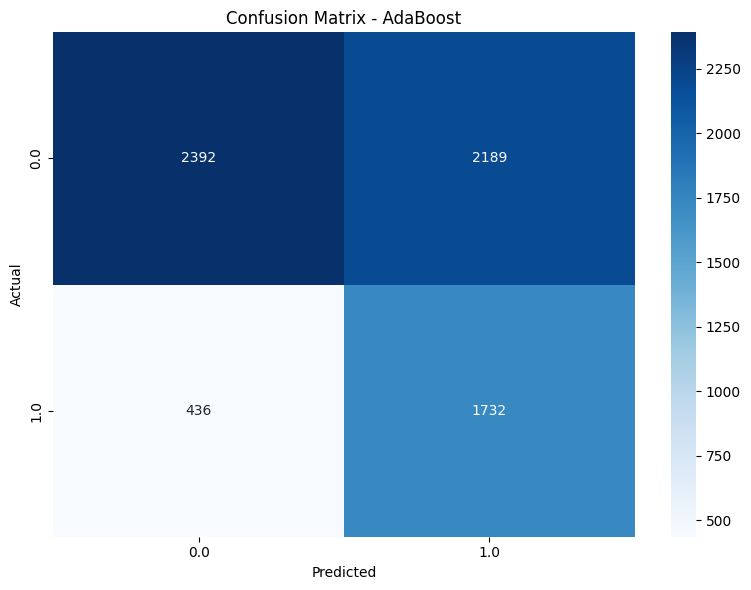


🚀 Training and Evaluating: LightGBM
[LightGBM] [Info] Number of positive: 9118, number of negative: 9118
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 710
[LightGBM] [Info] Number of data points in the train set: 18236, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
🔍 Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.48      0.61      4581
         1.0       0.42      0.81      0.56      2168

    accuracy                           0.58      6749
   macro avg       0.63      0.64      0.58      6749
weighted avg       0.71      0.58      0.59      6749



c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\mydata\G8Vitamin\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


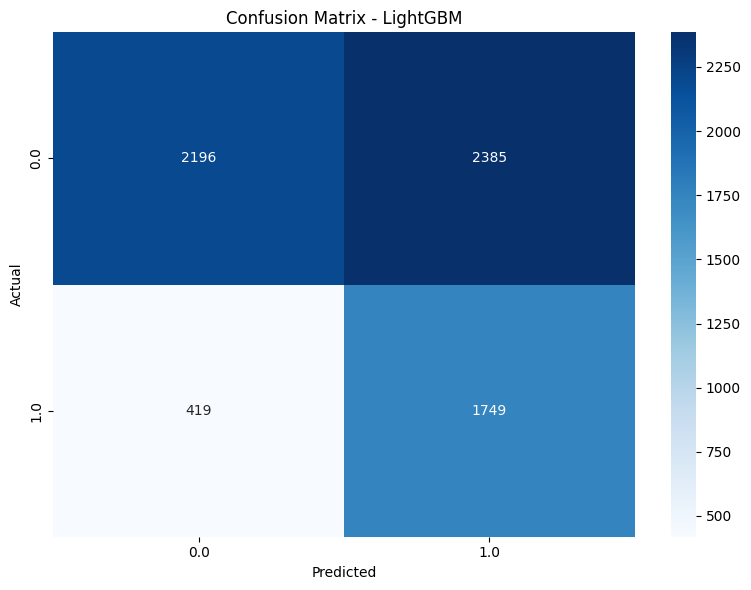

✅ Exported results to model_comparison_results_undersample_only.csv


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Separate features and labels
X_train_raw = df_train.drop(columns=['label'])
y_train = df_train['label']

X_test_raw = df_test.drop(columns=['label'])
y_test = df_test['label']

# Identify categorical and numeric columns
categorical_cols = ['Gender', 'Race', 'Hba1c', 'milk_consumption']
numeric_cols = [col for col in df_train.columns if col not in categorical_cols + ['label']]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# Define preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# Define models
models_to_test = {
    'XGBoost': XGBClassifier(
        colsample_bytree=1.0, learning_rate=0.1, max_depth=7,
        n_estimators=50, subsample=1.0, use_label_encoder=False,
        eval_metric='mlogloss', random_state=42
    ),
    'ElasticNetLogistic': LogisticRegression(
        penalty='elasticnet', solver='saga', max_iter=1000,
        random_state=42, multi_class='multinomial', C=1.0, l1_ratio=1.0
    ),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
}

results = []

for name, model in models_to_test.items():
    print(f"\n🚀 Training and Evaluating: {name}")
    
    pipe = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('undersample', RandomUnderSampler(random_state=42)),
        ('classifier', model)
    ])
    
    pipe.fit(X_train_raw, y_train)
    y_pred = pipe.predict(X_test_raw)
    y_proba = pipe.predict_proba(X_test_raw)

    # Handle binary and multiclass AUC
    if len(np.unique(y_test)) == 2:
        auc = roc_auc_score(y_test, y_proba[:, 1])
    else:
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')

    # Collect scores
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Save result
    results.append({
        'Model': name,
        'Precision (Macro)': precision,
        'Recall (Macro)': recall,
        'F1 Score (Macro)': f1,
        'Accuracy': accuracy,
        'AUC': auc
    })

    # Optional: show classification report and confusion matrix
    print("🔍 Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv("model_comparison_results_undersample_only.csv", index=False)
print("✅ Exported results to model_comparison_results_undersample_only.csv")
